In [829]:
import requests
import sys
import os
import time
import re
import operator
from operator import itemgetter
import json
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import math
from operator import add
from collections import defaultdict
import copy
import statsmodels.api as sm
import csv
from operator import itemgetter
import time

In [57]:
user_agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.76 Safari/537.36"
headers = { 'User-Agent' : user_agent }
base_url = "http://sports.yahoo.com"
rest ="/nba/players?type=lastname&query="
ab = 65
urldict = {}
def getUrls(urls,alphabet):
    while alphabet<=90:
        #time.sleep(5)
        page_url = base_url+rest+chr(alphabet)
        response = requests.get(page_url, headers=headers)
        htmlpage = response.text.encode('utf-8')
        soup = BeautifulSoup(htmlpage, "lxml")
        pageplayers1 = soup.find_all("tr", {"class": "ysprow1"})
        pageplayers2 = soup.find_all("tr", {"class": "ysprow2"})
        #print (len(pageplayers1)+len(pageplayers2))
        #print(alphabet)
        for player in pageplayers1:
            playerurl = player.find("a", href = True)
            tds = player.find_all('td')
            if str(type(playerurl)) != "<type 'NoneType'>":
                position = tds[1].find(text=True)
                team = tds[2].find("a")
                team = team.find(text=True)
                name = playerurl.find(text=True)+':'+position+':'+team
                playerurl = playerurl['href']
                if str(name) not in urls:
                    urls[str(name)] = playerurl
        for player in pageplayers2:
            playerurl = player.find("a", href = True)
            tds = player.find_all('td')
            if str(type(playerurl)) != "<type 'NoneType'>":
                position = tds[1].find(text=True)
                team = tds[2].find("a")
                team = team.find(text=True)
                name = playerurl.find(text=True)+':'+position+':'+team
                playerurl = playerurl['href']
                if str(name) not in urls:
                    urls[str(name)] = playerurl
        alphabet = alphabet + 1
    return (urls)   
while len(urldict)<805:
    ab=65
    urldict = getUrls(urldict, ab)
    print (len(urldict))
print (urldict)


805
{'Anthony Tolliver:F:Detroit Pistons': '/nba/players/4371', 'Nik Stauskas:SG:Philadelphia 76ers': '/nba/players/5319', 'Archie Goodwin:G:Phoenix Suns': '/nba/players/5199', 'Joakim Noah:FC:Chicago Bulls': '/nba/players/4287', 'Othyus Jeffers:GF:Minnesota Timberwolves': '/nba/players/4711', 'Raul Neto:PG:Utah Jazz': '/nba/players/5217', 'Christian Watford:PF:Boston Celtics': '/nba/players/5415', 'Derrick Rose:PG:Chicago Bulls': '/nba/players/4387', 'Ryan Boatright:PG:Brooklyn Nets': '/nba/players/5529', 'Jorge Gutierrez:PG:Charlotte Hornets': '/nba/players/5265', 'Tre Kelley:PG:Miami Heat': '/nba/players/4539', 'Michael Frazier II:SG:Los Angeles Lakers': '/nba/players/5542', 'Tyus Jones:PG:Minnesota Timberwolves': '/nba/players/5484', 'Randy Foye:G:Oklahoma City Thunder': '/nba/players/4135', 'Travis Wear:PF:New York Knicks': '/nba/players/5389', 'Axel Toupane:GF:Denver Nuggets': '/nba/players/5528', 'Tim Hardaway Jr.:GF:Atlanta Hawks': '/nba/players/5194', 'Vince Carter:GF:Memphis 

In [59]:
performance_dict ={}
for player in urldict:
    print(player)
    gamelog = []
    player_game_log_url = base_url+urldict[player]+"/gamelog/"
    response = requests.get(player_game_log_url, headers=headers)
    htmlpage = response.text.encode('utf-8')
    soup = BeautifulSoup(htmlpage, 'lxml')
    data = soup.find("div", {"class": "data-container"})
    if str(type(data)) != "<type 'NoneType'>":
        data = data.find('tbody')
        games = data.find_all('tr')
        games = games[:-1]
        for game in games:
            day=[]
            #people changed from team to all star
            daystats = game.find_all('td')
            if daystats[0].find(text=True)[:17]!="Changed team from" and daystats[0].find(text=True)!="WCS" and  daystats[0].find(text=True)!="@ECS":
                date = game.find('th')
                date = str(date.find(text=True))
                day.append(date)
                for number in daystats:
                    #print(number['class'])
                    if number['class'] == ['opponent', 'opponent'] or number['class'] == ['score', 'score']:
                        txt = str(number.find(text=True))
                        day.append(txt)
                    #elif number['title'] != "Free Throw Percentage" and number['title'] != "3-point Percentage" and number['title'] != "Field Goal Percentage":
                    else:
                        txt = str(number.find(text=True))
                        if ":" in txt:
                            #keep OT, 2OT in mind
                            txt = str((int(txt.partition(":")[0])*60.0+float(int(txt.partition(":")[2])))/(42.0*60.0))

                        day.append(txt)
                #make the total score for fanduel
                day.append(int(day[-1])+1.2*int(day[-7])+1.5*int(day[-6])+2*int(day[-3])+2*int(day[-4])-int(day[-5]))
                gamelog.append(day)
        performance_dict[player] = gamelog

Anthony Tolliver:F:Detroit Pistons
Nik Stauskas:SG:Philadelphia 76ers
Archie Goodwin:G:Phoenix Suns
Joakim Noah:FC:Chicago Bulls
Othyus Jeffers:GF:Minnesota Timberwolves
Raul Neto:PG:Utah Jazz
Christian Watford:PF:Boston Celtics
Derrick Rose:PG:Chicago Bulls
Ryan Boatright:PG:Brooklyn Nets
Jorge Gutierrez:PG:Charlotte Hornets
Tre Kelley:PG:Miami Heat
Michael Frazier II:SG:Los Angeles Lakers
Tyus Jones:PG:Minnesota Timberwolves
Randy Foye:G:Oklahoma City Thunder
Travis Wear:PF:New York Knicks
Axel Toupane:GF:Denver Nuggets
Tim Hardaway Jr.:GF:Atlanta Hawks
Vince Carter:GF:Memphis Grizzlies
Nick Young:GF:Los Angeles Lakers
Stephen Curry:G:Golden State Warriors
Garrett Temple:G:Washington Wizards
Ricky Rubio:PG:Minnesota Timberwolves
Jordan Bachynski:C:Detroit Pistons
Kyle Anderson:SF:San Antonio Spurs
Jason Terry:G:Houston Rockets
Luc Richard Mbah a Moute:F:Los Angeles Clippers
Chris Andersen:FC:Memphis Grizzlies
Bobby Portis:FC:Chicago Bulls
Carrick Felix:GF:Utah Jazz
Andrew Wiggins:GF:

In [1131]:
print(performance_dict['DeMarcus Cousins:FC:Sacramento Kings'])

[['Apr 9', 'OKC', 'W 114-112', '0.759523809524', '7', '24', '29.2', '0', '3', '0.0', '1', '4', '25.0', '3', '4', '7', '3', '2', '2', '1', '6', '15', 31.9], ['Apr 5', 'POR', 'L 107-115', '0.915079365079', '11', '21', '52.4', '1', '4', '25.0', '7', '11', '63.6', '0', '9', '9', '1', '6', '2', '3', '2', '30', 46.3], ['Mar 30', 'WAS', 'W 120-111', '0.770238095238', '11', '18', '61.1', '1', '1', '100.0', '6', '9', '66.7', '1', '9', '10', '4', '5', '5', '4', '3', '29', 60.0], ['Mar 27', 'DAL', 'W 133-111', '0.668650793651', '7', '12', '58.3', '0', '1', '0.0', '6', '10', '60.0', '2', '10', '12', '5', '3', '2', '0', '2', '20', 42.9], ['Mar 25', 'PHO', 'W 116-94', '0.661904761905', '9', '18', '50.0', '1', '3', '33.3', '10', '14', '71.4', '2', '9', '11', '1', '1', '0', '1', '3', '29', 44.7], ['Mar 21', '@CHI', 'L 102-109', '0.84246031746', '6', '14', '42.9', '0', '1', '0.0', '7', '7', '100.0', '4', '14', '18', '3', '8', '1', '2', '3', '19', 43.099999999999994], ['Mar 20', '@NY', 'W 88-80', '0.888

In [1129]:
with open('nba591data.json', 'w') as dt:
    json.dump(performance_dict, dt, indent=4, separators=(',', ': '))

In [1306]:
noperc_performance_dict = copy.deepcopy(performance_dict)
for player in noperc_performance_dict:
    for game in noperc_performance_dict[player]:
        del game[-17]
        del game[-14]
        del game[-11]
        del game[-10]
        del game[-9]
        del game[-3]

In [1307]:
player_names=noperc_performance_dict.keys()
print (len(noperc_performance_dict))
print(noperc_performance_dict["Randy Foye:G:Oklahoma City Thunder"])

470
[['Apr 25', 'DAL', 'W 118-104', '0.246428571429', '0', '1', '0', '0', '2', '2', '4', '4', '0', '0', '0', '2', 12.8], ['Apr 23', '@DAL', 'W 119-108', '0.218253968254', '1', '4', '1', '3', '0', '0', '1', '0', '1', '0', '0', '3', 3.2], ['Apr 21', '@DAL', 'W 131-102', '0.325793650794', '1', '3', '1', '2', '0', '0', '3', '1', '2', '0', '0', '3', 6.1], ['Apr 18', 'DAL', 'L 84-85', '0.236507936508', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', 2.7], ['Apr 16', 'DAL', 'W 108-70', '0.425396825397', '1', '6', '1', '4', '0', '0', '2', '1', '3', '0', '1', '3', 5.9], ['Apr 12', '@SA', 'L 98-102', '0.403174603175', '2', '7', '0', '2', '4', '4', '1', '3', '3', '0', '0', '8', 10.7], ['Apr 11', 'LAL', 'W 112-79', '0.293650793651', '4', '9', '0', '1', '0', '0', '2', '0', '0', '1', '2', '8', 16.4], ['Apr 9', '@SAC', 'L 112-114', '0.454761904762', '2', '3', '1', '2', '0', '0', '0', '0', '2', '0', '0', '5', 3.0], ['Apr 6', '@POR', 'L 115-120', '0.87380952381', '3', '13', '1', '2', '4', '

In [1354]:
just_performance_dict_with_percentages = copy.deepcopy(performance_dict)
for player in just_performance_dict_with_percentages:
    for game in just_performance_dict_with_percentages[player]:
        del game[0]
        del game[0]
        del game[0]
        del game[-9]
        del game[-8]
        del game[-3]
        for k in range(0,len(game)):
            game[:0]=[game[0]]
print(just_performance_dict_with_percentages["Randy Foye:G:Oklahoma City Thunder"])

[['0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0', '1', '0.0', '0', '0', '0.0', '2', '2', '100.0', '0', '4', '0', '0', '0', '2', 12.8], ['0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '1', '4', '25.0', '1', '3', '33.3', '0', '0', '0.0', '0', '0', '1', '0', '0', '3', 3.2], ['0.325793650794', '0.325793650794', '0.325793650794', '0.325793650794', '0.325793650794', '0.325793650794', '0.325793650794', '0.325793650794', '0.325793650794', '0.3257

In [1355]:
kmean_players = defaultdict(list)
for player in just_performance_dict_with_percentages:
    k=0
    for game in just_performance_dict_with_percentages[player]:
        if kmean_players[player] == []:
            kmean_players[player] = map(float, just_performance_dict_with_percentages[player][k])
        else:
            kmean_players[player] = map(add, kmean_players[player], map(float, just_performance_dict_with_percentages[player][k]))
        
        k=k+1
    kmean_players[player] =  [int(x * 100/k) for x in kmean_players[player]]
print(kmean_players)
print(kmean_players.values())
   

defaultdict(<type 'list'>, {'Archie Goodwin:G:Phoenix Suns': [46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 308, 740, 3949, 40, 173, 1377, 228, 338, 5150, 47, 207, 175, 47, 22, 885, 1460], 'Joakim Noah:FC:Chicago Bulls': [52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 175, 458, 3360, 0, 3, 0, 75, 155, 2758, 300, 379, 179, 62, 100, 427, 2196], 'Raul Neto:PG:Utah Jazz': [44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 222, 516, 4150, 79, 200, 3787, 64, 86, 3107, 20, 214, 134, 76, 2, 587, 1111], 'Jorge Gutierrez:PG:Charlotte Hornets': [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 42, 92, 3095, 0, 14, 0, 71, 78, 2500, 0, 135, 42, 21, 0, 157, 429], 'Tyus Jones:PG:Minnesota Timberwolves': [36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 151, 421, 3467, 43, 143, 2004, 75, 105, 3468, 18, 291, 89, 83, 8, 421, 1106], 'Randy Foye:G:Oklahoma City Thunder': [47, 47, 47, 47, 

[6 5 3 4 3 3 3 3 0 3 2 3 2 0 5 1 6 5 3 2 5 0 6 5 0 4 2 3 2 3 3 1 2 4 3 5 4
 6 0 0 3 5 3 4 0 0 2 0 0 4 3 1 3 4 6 0 1 0 4 5 2 0 5 1 2 6 0 3 1 6 6 2 2 6
 6 3 6 1 3 0 5 3 1 0 4 6 4 5 6 0 1 0 1 3 4 4 5 0 1 5 3 1 2 0 5 4 0 5 5 3 0
 6 4 4 2 0 0 2 5 0 5 6 2 0 2 6 3 4 5 2 6 2 5 0 6 2 6 5 3 2 4 3 4 1 3 4 6 6
 6 4 0 0 5 4 0 3 0 3 4 5 4 3 6 0 3 1 3 0 3 4 6 2 1 1 1 0 4 5 1 2 0 3 0 2 1
 1 3 4 1 1 3 2 4 0 1 5 4 5 5 6 0 2 1 5 0 6 2 2 6 3 2 0 4 3 3 2 4 0 4 4 4 0
 0 6 4 3 1 4 2 2 4 3 6 3 2 3 2 3 1 6 4 3 2 3 2 0 3 6 4 3 0 5 6 2 2 0 2 0 2
 1 3 4 5 3 0 3 2 4 3 0 6 6 5 1 5 4 6 3 2 2 5 1 1 1 3 3 4 4 3 1 5 5 6 0 4 6
 4 3 4 3 4 4 0 3 3 0 0 5 2 1 4 5 4 3 1 0 3 1 6 6 5 3 3 0 5 4 3 2 5 0 0 5 3
 6 4 0 5 0 6 2 2 4 3 4 0 0 3 5 5 5 3 0 3 0 3 3 4 2 2 4 2 4 3 6 0 1 3 4 6 2
 0 3 0 2 6 4 4 2 3 0 6 1 0 6 4 1 5 5 5 3 4 4 2 3 6 3 2 4 5 2 6 3 0 1 3 6 4
 2 0 5 0 3 2 4 0 4 3 1 6 1 2 5 5 5 5 6 4 6 5 1 6 0 2 2 2 3 3 3 1 3 5 0 3 1
 2 0 6 1 6 2 0 3 4 0 2 6 3 2 0 2 6 3 5 3 6 3 6 6 6 4]


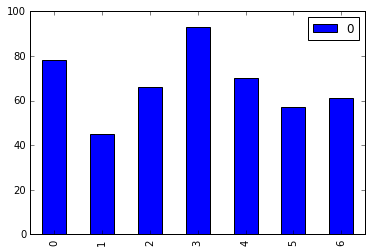

In [1363]:
from sklearn.cluster import KMeans
from collections import Counter
kmeans = KMeans(init = 'k-means++', n_clusters =7)
kmeans.fit(kmean_players.values())
labels= kmeans.labels_ 
print(labels)
letter_counts = Counter(labels)
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')


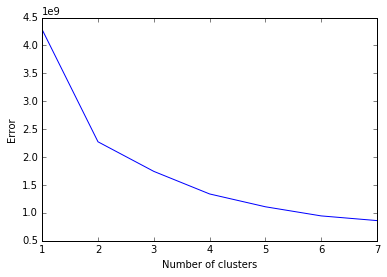

In [1364]:

error = np.zeros(8)
error[0] = 0;
for k in range(1,8):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=8)
    kmeans.fit_predict(kmean_players.values())
    error[k] = kmeans.inertia_
    
plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
plt.ylabel('Error')

In [1497]:
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []
lll= kmean_players.keys()
ll=0
for i in labels:
    if i == 0:
        cluster0.append(lll[ll])
    if i == 1:
        cluster1.append(lll[ll])
    if i == 2:
        cluster2.append(lll[ll])
    if i == 3:
        cluster3.append(lll[ll])
    if i == 4:
        cluster4.append(lll[ll])
    if i == 5:
        cluster5.append(lll[ll])
    if i == 6:
        cluster6.append(lll[ll])
    ll=ll+1
    
print(cluster0)

['Vince Carter:GF:Memphis Grizzlies', 'Norris Cole:G:New Orleans Pelicans', 'Omri Casspi:F:Sacramento Kings', 'Bojan Bogdanovic:GF:Brooklyn Nets', 'Emmanuel Mudiay:PG:Denver Nuggets', 'Matt Barnes:GF:Memphis Grizzlies', 'Marvin Williams:F:Charlotte Hornets', 'DeMarre Carroll:F:Toronto Raptors', 'Dion Waiters:GF:Oklahoma City Thunder', 'Al-Farouq Aminu:F:Portland Trail Blazers', 'Austin Rivers:G:Los Angeles Clippers', "D'Angelo Russell:PG:Los Angeles Lakers", 'Arron Afflalo:GF:New York Knicks', 'Isaiah Canaan:PG:Philadelphia 76ers', 'Jared Sullinger:FC:Boston Celtics', 'Rajon Rondo:PG:Sacramento Kings', 'George Hill:G:Indiana Pacers', 'Allen Crabbe:G:Portland Trail Blazers', 'J.J. Redick:SG:Los Angeles Clippers', 'Jordan Hamilton:SF:New Orleans Pelicans', 'J.J. Barea:G:Dallas Mavericks', 'Devin Harris:G:Dallas Mavericks', 'Cory Joseph:PG:Toronto Raptors', 'Terrence Jones:F:Houston Rockets', 'Tony Parker:PG:San Antonio Spurs', 'Otto Porter:SF:Washington Wizards', 'Al Horford:FC:Atlanta H

In [1498]:
def compute_cluster_reg(cluster, all_players):
    cluster_total=[]
    kop = 0
    for player in all_players:
        if player in cluster:
            gun = all_players[player][18:-1]
            del gun[2]
            del gun[4]
            del gun[6]
            cluster_total.append(gun)         
    return(cluster_total)

In [1499]:
def compute_cluster_ys(cluster, all_players):
    y=[]
    for player in all_players:
        if player in cluster:
            y.append(all_players[player][-1])
    return(y)

In [1500]:
cluster0total = compute_cluster_reg(cluster0, kmean_players)
cluster1total = compute_cluster_reg(cluster1, kmean_players)
cluster2total = compute_cluster_reg(cluster2, kmean_players)
cluster3total = compute_cluster_reg(cluster3, kmean_players)
cluster4total = compute_cluster_reg(cluster4, kmean_players)
cluster5total = compute_cluster_reg(cluster5, kmean_players)
cluster6total = compute_cluster_reg(cluster6, kmean_players)
print(cluster6total)
cluster_totals_X = {"0":cluster0total, "1":cluster1total, "2":cluster2total, "3":cluster3total, "4":cluster4total, "5":cluster5total, "6":cluster6total}


cluster0y = compute_cluster_ys(cluster0, kmean_players)
cluster1y = compute_cluster_ys(cluster1, kmean_players)
cluster2y = compute_cluster_ys(cluster2, kmean_players)
cluster3y = compute_cluster_ys(cluster3, kmean_players)
cluster4y = compute_cluster_ys(cluster4, kmean_players)
cluster5y = compute_cluster_ys(cluster5, kmean_players)
cluster6y = compute_cluster_ys(cluster6, kmean_players)

cluster_totals_Y = {"0":cluster0y, "1":cluster1y,"2":cluster2y, "3":cluster3y, "4":cluster4y, "5":cluster5y, "6":cluster6y}

[[308, 740, 40, 173, 228, 338, 47, 207, 175, 47, 22, 885], [50, 100, 0, 0, 100, 100, 0, 100, 150, 0, 0, 200], [366, 673, 0, 5, 187, 324, 91, 170, 133, 94, 45, 921], [277, 475, 0, 1, 160, 259, 265, 96, 140, 54, 66, 715], [456, 876, 1, 2, 200, 338, 229, 182, 235, 176, 149, 1114], [275, 812, 37, 212, 250, 462, 25, 250, 362, 37, 0, 837], [320, 629, 0, 4, 262, 406, 247, 293, 186, 82, 103, 904], [224, 507, 0, 2, 144, 179, 162, 117, 93, 39, 135, 593], [444, 890, 4, 24, 140, 195, 124, 67, 116, 40, 155, 1033], [217, 475, 13, 48, 127, 179, 134, 148, 89, 134, 55, 575], [315, 756, 0, 9, 190, 309, 203, 125, 171, 75, 137, 821], [316, 596, 1, 12, 241, 318, 187, 93, 92, 74, 83, 876], [338, 800, 1, 8, 223, 306, 228, 124, 185, 48, 79, 901], [225, 430, 0, 5, 108, 133, 125, 83, 66, 55, 33, 558], [100, 300, 0, 50, 150, 250, 0, 150, 100, 150, 0, 350], [324, 580, 0, 0, 263, 463, 340, 149, 186, 73, 221, 913], [820, 1609, 3, 13, 173, 230, 267, 275, 189, 81, 107, 1816], [281, 609, 0, 3, 280, 361, 319, 177, 149,

In [1501]:
for pos in cluster_totals_X:
    cluster_totals_X[pos] = pd.DataFrame(cluster_totals_X[pos])
    cluster_totals_X[pos].columns = ['Field Goals Made', 'Field Goals attempted', '3pt made', '3pt attempted', 'FT  made', 'FT attempted', 'Rebounds', 'Assists', 'TO', 'Stls', 'Blks', 'Pts']

In [1511]:
attribs_player = ['Field Goals Made', 'Field Goals attempted', '3pt made', '3pt attempted', 'FT  made', 'FT attempted', 'Rebounds', 'Assists', 'TO', 'Stls', 'Blks', 'Pts']
def model_fitC(name, X, Y, names, datess, attributes_pla, attribs_pl, cl0, cl1, cl2, cl3, cl4, cl5, cl6):
    save_name = copy.deepcopy(name)
    for nam in names:
        if name == nam.partition(':')[0]:
            name = nam
            break
    if name in cl0:
        cluster = "0"
    if name in cl1:
        cluster = "1"
    if name in cl2:
        cluster = "2"
    if name in cl3:
        cluster = "3"
    if name in cl4:
        cluster = "4"
    if name in cl5:
        cluster = "5"
    if name in cl6:
        cluster = "6"
    mx=1
    bad_inx=[]
    while mx>0.1:
        model = sm.OLS(Y[cluster], X[cluster])
        results = model.fit()
        
        pv = list(results.pvalues)
        mx = max(pv)
        mxindx = pv.index(mx)
        if mx > 0.1:
            X[cluster] = X[cluster].drop(X[cluster].columns[mxindx], axis=1)
   # print(results.summary())
    stat_names = list(X[cluster].columns.values)        
    coefficients = results.params
    #print(coefficients)
    player_stats = []

    player_stats=copy.deepcopy(attributes_pla[name])
    player_stats= player_stats[18:-1]
    del player_stats[2]
    del player_stats[4]
    del player_stats[6]
    #print(player_stats)

    pl_indexes=[]
    tm_indexes=[]
    for stnam in stat_names:
        if stnam in attribs_pl:
            pl_indexes.append(attribs_pl.index(stnam))
    pl_indexes = list(set([0,1,2,3,4,5,6,7,8,9,10,11])-set(pl_indexes))
    pl_indexes.sort(reverse=True)
    #print(pl_indexes)
    for indexx in pl_indexes:
        del player_stats[indexx]
    #print(player_stats)
    #print(name)
    dct = {save_name: np.dot(player_stats, coefficients)/100}
    return(dct)

In [1512]:
print(model_fitC('Mason Plumlee', cluster_totals_X, cluster_totals_Y, player_names, dates , kmean_players, attribs_player, cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6))

{'Mason Plumlee': 2527.6044245980029}


In [1504]:
players = fanduel_H2H_parser("FanDuel-NBA-2016-04-27-15424-players-list.csv")
#print(players)
player_opp = []
players_to_del=[]
for player in players:
    if int(players[player]["Games Played"]) > 5 and player != 'Frank Kaminsky':
        player_tup = [player, players[player]["Opponent"]]
        player_opp.append(player_tup)
    else:
        players_to_del.append(player)

for player in players_to_del:
    del players[player]
    
print(players) 

{'Mason Plumlee': {'Salary': '6100', 'Position': 'C', 'Fantasy Points': '24.31219512195122', 'Games Played': '82', 'Opponent': 'LAC'}, 'Pablo Prigioni': {'Salary': '3500', 'Position': 'PG', 'Fantasy Points': '9.081355932203389', 'Games Played': '59', 'Opponent': 'POR'}, 'Luol Deng': {'Salary': '6600', 'Position': 'PF', 'Fantasy Points': '24.02162162162162', 'Games Played': '74', 'Opponent': 'CHA'}, 'Draymond Green': {'Salary': '8800', 'Position': 'PF', 'Fantasy Points': '38.9604938271605', 'Games Played': '81', 'Opponent': 'HOU'}, 'Troy Daniels': {'Salary': '3500', 'Position': 'SG', 'Fantasy Points': '8.044186046511628', 'Games Played': '43', 'Opponent': 'MIA'}, 'Chris Paul': {'Salary': '9500', 'Position': 'PG', 'Fantasy Points': '41.36486486486486', 'Games Played': '74', 'Opponent': 'POR'}, 'Festus Ezeli': {'Salary': '3500', 'Position': 'C', 'Fantasy Points': '16.83478260869565', 'Games Played': '46', 'Opponent': 'HOU'}, 'Kemba Walker': {'Salary': '8200', 'Position': 'PG', 'Fantasy Po

In [1505]:
mama3=[]
for tpl in player_opp:
    mama3.append(model_fitC(tpl[0], cluster_totals_X, cluster_totals_Y, player_names, dates ,kmean_players, attribs_player, cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6))

In [1506]:
fantasy_predictions = {}
for dct in mama3:
    player_name = dct.keys()[0]
    prediction = dct.values()[0]
    
    fantasy_predictions.update({player_name : prediction})
    
for player in players:
    players[player]["Fantasy Prediction"] = fantasy_predictions[player]

    

In [1507]:
fanduel_H2H_picker(players, 60000)

0.213916163092
0.232364088633
0.19112331796
0.194130382355
0.16846604796
{'Total FP': 61.79190059905497, 'Damian Lillard': {'Salary': '8000', 'Games Played': '75', 'Fantasy Points': '39.37866666666667', 'Position': 'PG', 'Fantasy Prediction': 40.185910245305671, 'Opponent': 'LAC'}, 'Patrick Beverley': {'Salary': '4800', 'Games Played': '71', 'Fantasy Points': '21.232394366197184', 'Position': 'PG', 'Fantasy Prediction': 21.605990353749295, 'Opponent': 'GS'}}
{'Total FP': 69.18658937878814, 'J.J. Redick': {'Salary': '4200', 'Games Played': '75', 'Fantasy Points': '20.904', 'Position': 'SG', 'Fantasy Prediction': 21.604447416568032, 'Opponent': 'POR'}, 'James Harden': {'Salary': '10500', 'Games Played': '82', 'Fantasy Points': '47.575609756097556', 'Position': 'SG', 'Fantasy Prediction': 47.582141962220113, 'Opponent': 'GS'}}
{'Total FP': 53.89709972436406, 'Trevor Ariza': {'Salary': '5500', 'Games Played': '81', 'Fantasy Points': '24.755555555555556', 'Position': 'SF', 'Fantasy Predicti

In [1311]:
print(just_performance_dict_with_percentages["Randy Foye:G:Oklahoma City Thunder"])

[['0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0.246428571429', '0', '1', '0.0', '0', '0', '0.0', '2', '2', '100.0', '0', '4', '0', '0', '0', '2'], ['0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '0.218253968254', '1', '4', '25.0', '1', '3', '33.3', '0', '0', '0.0', '0', '0', '1', '0', '0', '3'], ['0.325793650794', '0.325793650794', '0.325793650794', '0.325793650794', '0.325793650794', '0.325793650794', '0.325793650794', '0.325793650794', '0.325793650794', '0.325793650794', '0.325793650794', '0.325793650794', 

In [1308]:
just_performance_dict = copy.deepcopy(noperc_performance_dict)
for player in just_performance_dict:
    for game in just_performance_dict[player]:
        del game[0]
        del game[0]
        del game[0]
        del game[-1]
        game = map(float, game)

In [1309]:
print(just_performance_dict["Randy Foye:G:Oklahoma City Thunder"])

[['0.246428571429', '0', '1', '0', '0', '2', '2', '4', '4', '0', '0', '0', '2'], ['0.218253968254', '1', '4', '1', '3', '0', '0', '1', '0', '1', '0', '0', '3'], ['0.325793650794', '1', '3', '1', '2', '0', '0', '3', '1', '2', '0', '0', '3'], ['0.236507936508', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0'], ['0.425396825397', '1', '6', '1', '4', '0', '0', '2', '1', '3', '0', '1', '3'], ['0.403174603175', '2', '7', '0', '2', '4', '4', '1', '3', '3', '0', '0', '8'], ['0.293650793651', '4', '9', '0', '1', '0', '0', '2', '0', '0', '1', '2', '8'], ['0.454761904762', '2', '3', '1', '2', '0', '0', '0', '0', '2', '0', '0', '5'], ['0.87380952381', '3', '13', '1', '2', '4', '4', '3', '4', '2', '1', '0', '11'], ['0.456746031746', '2', '5', '1', '4', '0', '0', '0', '1', '2', '0', '1', '5'], ['0.410317460317', '2', '4', '2', '3', '0', '0', '1', '2', '0', '1', '1', '6'], ['0.494047619048', '1', '3', '1', '3', '0', '0', '0', '3', '1', '1', '0', '3'], ['0.555555555556', '3', '9', '1', '4',

In [1209]:
teams = defaultdict(dict)
for player in noperc_performance_dict:
    for game in noperc_performance_dict[player]:
        tname = game[1]
        gint= map(int, game[4:-1])
        if tname[0]=='@':
            if game[0] not in teams[tname[1:]]:
                teams[tname[1:]][game[0]] = gint
            else:
                teams[tname[1:]][game[0]]= map(add, teams[tname[1:]][game[0]], gint)
        else:
            if game[0] not in teams[tname]:
                teams[tname][game[0]] = gint
            else:
                teams[tname][game[0]] = map(add, teams[tname][game[0]], gint)
                


In [1210]:
print(teams['MIN'])

{'Apr 11': [48, 86, 15, 30, 18, 26, 43, 28, 17, 12, 5, 129], 'Nov 15': [40, 71, 9, 17, 25, 27, 34, 21, 15, 7, 6, 114], 'Nov 12': [48, 89, 18, 38, 15, 16, 33, 34, 11, 8, 7, 129], 'Nov 2': [41, 89, 9, 30, 15, 20, 46, 18, 16, 5, 6, 106], 'Nov 10': [38, 78, 8, 26, 20, 27, 34, 18, 15, 8, 5, 104], 'Nov 17': [36, 79, 5, 24, 14, 30, 51, 20, 22, 3, 12, 91], 'Feb 6': [40, 85, 8, 20, 17, 19, 31, 27, 11, 5, 4, 105], 'Apr 1': [38, 72, 8, 22, 14, 23, 43, 13, 15, 9, 5, 98], 'Apr 13': [40, 92, 11, 30, 18, 22, 33, 31, 16, 7, 0, 109], 'Nov 18': [41, 110, 9, 21, 13, 21, 54, 20, 9, 10, 4, 104], 'Nov 5': [37, 76, 4, 14, 18, 25, 42, 14, 16, 6, 6, 96], 'Dec 20': [32, 78, 5, 21, 16, 20, 39, 26, 14, 7, 2, 85], 'Apr 5': [49, 98, 12, 35, 7, 8, 46, 35, 23, 9, 5, 117], 'Jan 29': [40, 76, 10, 25, 13, 16, 40, 24, 13, 8, 5, 103], 'Apr 3': [32, 83, 14, 40, 10, 17, 44, 19, 10, 6, 4, 88], 'Dec 31': [30, 72, 14, 35, 18, 21, 34, 23, 12, 7, 3, 92], 'Dec 30': [28, 80, 10, 39, 14, 20, 44, 15, 19, 8, 8, 80], 'Jan 25': [45, 89

In [1211]:
with open('nba591data2.json', 'w') as dt:
    json.dump(team, dt, indent=4, separators=(',', ': '))

In [1212]:
dates =[]
for kl in range(0,7):
    if kl==0:
        month="Apr "
        for km in range(31,0,-1):
            dates.append(month+str(km))
    if kl==1:
        month="Mar "
        for km in range(31,0,-1):
            dates.append(month+str(km))
    if kl==2:
        month="Feb "
        for km in range(31,0,-1):
            dates.append(month+str(km))
    if kl==3:
        month="Jan "
        for km in range(31,0,-1):
            dates.append(month+str(km))
    if kl==4:
        month="Dec "
        for km in range(31,0,-1):
            dates.append(month+str(km))
    if kl==5:
        month="Nov "
        for km in range(31,0,-1):
            dates.append(month+str(km))
    if kl==6:
        month="Oct "
        for km in range(31,0,-1):
            dates.append(month+str(km))

In [1213]:
print(dates)

['Apr 31', 'Apr 30', 'Apr 29', 'Apr 28', 'Apr 27', 'Apr 26', 'Apr 25', 'Apr 24', 'Apr 23', 'Apr 22', 'Apr 21', 'Apr 20', 'Apr 19', 'Apr 18', 'Apr 17', 'Apr 16', 'Apr 15', 'Apr 14', 'Apr 13', 'Apr 12', 'Apr 11', 'Apr 10', 'Apr 9', 'Apr 8', 'Apr 7', 'Apr 6', 'Apr 5', 'Apr 4', 'Apr 3', 'Apr 2', 'Apr 1', 'Mar 31', 'Mar 30', 'Mar 29', 'Mar 28', 'Mar 27', 'Mar 26', 'Mar 25', 'Mar 24', 'Mar 23', 'Mar 22', 'Mar 21', 'Mar 20', 'Mar 19', 'Mar 18', 'Mar 17', 'Mar 16', 'Mar 15', 'Mar 14', 'Mar 13', 'Mar 12', 'Mar 11', 'Mar 10', 'Mar 9', 'Mar 8', 'Mar 7', 'Mar 6', 'Mar 5', 'Mar 4', 'Mar 3', 'Mar 2', 'Mar 1', 'Feb 31', 'Feb 30', 'Feb 29', 'Feb 28', 'Feb 27', 'Feb 26', 'Feb 25', 'Feb 24', 'Feb 23', 'Feb 22', 'Feb 21', 'Feb 20', 'Feb 19', 'Feb 18', 'Feb 17', 'Feb 16', 'Feb 15', 'Feb 14', 'Feb 13', 'Feb 12', 'Feb 11', 'Feb 10', 'Feb 9', 'Feb 8', 'Feb 7', 'Feb 6', 'Feb 5', 'Feb 4', 'Feb 3', 'Feb 2', 'Feb 1', 'Jan 31', 'Jan 30', 'Jan 29', 'Jan 28', 'Jan 27', 'Jan 26', 'Jan 25', 'Jan 24', 'Jan 23', 'Jan 2

In [1214]:
allowed_attributes_teams=defaultdict(dict)

for team in teams:
    k=0
    teamkeys=teams[team].keys()
    teamkeys.sort(key=lambda x: dates.index(x))
    print(teamkeys)
    allowed_attributes_teams[team]={}
    for date in teamkeys:
        last_five=[]      
        if (len(teamkeys)-teamkeys.index(date))>5:
            
            prev_dates = teamkeys[teamkeys.index(date)+1:teamkeys.index(date)+6]
            for prev_date in prev_dates:
                if date == 'Apr 10' and team=='MIL':
                    print(prev_date)
                    print(teams[team][prev_date])
                last_five.append(teams[team][prev_date])
            
        if last_five!=[]:
            allowed_attributes_teams[team][date]=[]

            flen = float(len(last_five))


            five_totals = [ sum(x) for x in zip(*last_five) ]


            five_av = [x / flen for x in five_totals]
            
            allowed_attributes_teams[team][date]=(five_av)


['Apr 13', 'Apr 11', 'Apr 10', 'Apr 8', 'Apr 5', 'Apr 3', 'Apr 1', 'Mar 30', 'Mar 26', 'Mar 25', 'Mar 23', 'Mar 21', 'Mar 20', 'Mar 17', 'Mar 15', 'Mar 13', 'Mar 12', 'Mar 9', 'Mar 7', 'Mar 6', 'Mar 4', 'Mar 2', 'Feb 29', 'Feb 27', 'Feb 25', 'Feb 22', 'Feb 20', 'Feb 19', 'Feb 11', 'Feb 9', 'Feb 5', 'Feb 2', 'Feb 1', 'Jan 29', 'Jan 28', 'Jan 26', 'Jan 23', 'Jan 22', 'Jan 19', 'Jan 16', 'Jan 15', 'Jan 13', 'Jan 12', 'Jan 10', 'Jan 8', 'Jan 5', 'Jan 4', 'Jan 2', 'Dec 31', 'Dec 29', 'Dec 28', 'Dec 26', 'Dec 23', 'Dec 20', 'Dec 18', 'Dec 16', 'Dec 15', 'Dec 12', 'Dec 11', 'Dec 9', 'Dec 7', 'Dec 5', 'Dec 4', 'Dec 2', 'Nov 30', 'Nov 29', 'Nov 27', 'Nov 25', 'Nov 23', 'Nov 21', 'Nov 19', 'Nov 17', 'Nov 14', 'Nov 11', 'Nov 10', 'Nov 7', 'Nov 6', 'Nov 4', 'Nov 2', 'Nov 1', 'Oct 30', 'Oct 28']
Apr 8
[44, 78, 6, 14, 30, 38, 34, 35, 14, 6, 9, 124]
Apr 5
[41, 75, 18, 36, 9, 10, 41, 30, 16, 4, 8, 109]
Apr 3
[39, 74, 7, 26, 17, 22, 34, 30, 11, 10, 4, 102]
Apr 1
[46, 86, 8, 24, 10, 12, 37, 34, 20, 13, 

In [1215]:
#team:day:att allowed
print(allowed_attributes_teams['MIL'])
print(len(allowed_attributes_teams['MIL']))

{'Apr 10': [41.6, 78.6, 8.8, 24.6, 15.8, 19.8, 38.8, 30.2, 16.6, 7.8, 6.6, 107.8], 'Apr 11': [41.8, 81.8, 10.4, 29.2, 16.6, 21.4, 38.2, 30.6, 14.8, 9.0, 7.0, 110.6], 'Nov 14': [34.6, 80.2, 5.6, 23.0, 16.4, 20.4, 43.2, 21.0, 14.6, 7.4, 5.6, 91.2], 'Apr 13': [40.8, 81.4, 10.2, 29.0, 18.2, 24.6, 38.0, 29.4, 12.8, 10.2, 7.4, 110.0], 'Nov 10': [35.4, 82.0, 6.0, 21.0, 16.0, 20.4, 43.8, 20.6, 15.8, 6.6, 4.6, 92.8], 'Nov 17': [35.2, 82.2, 7.2, 25.0, 17.2, 22.8, 43.8, 20.6, 15.0, 7.8, 5.4, 94.8], 'Nov 19': [35.2, 78.2, 8.8, 24.6, 17.8, 24.2, 41.8, 21.4, 14.2, 8.8, 5.0, 97.0], 'Nov 30': [36.8, 77.8, 11.6, 27.4, 19.2, 24.8, 39.4, 23.6, 14.0, 8.8, 4.8, 104.4], 'Apr 5': [40.6, 81.6, 8.2, 26.8, 14.2, 17.8, 39.6, 28.2, 14.4, 9.0, 6.0, 103.6], 'Jan 29': [35.8, 84.4, 12.0, 29.8, 16.4, 21.6, 39.4, 24.6, 11.0, 7.8, 5.0, 100.0], 'Apr 3': [40.8, 83.4, 8.8, 28.4, 15.4, 18.8, 41.2, 28.0, 14.6, 8.2, 6.8, 105.8], 'Dec 31': [37.8, 80.0, 9.0, 22.0, 21.6, 27.2, 38.6, 23.8, 12.8, 9.6, 5.6, 106.2], 'Apr 1': [37.2, 

In [1216]:
#ys:name:[[date, FDscore],...]
ys=defaultdict(list)
for player in noperc_performance_dict:
    ys[player]=[[row[0] for row in noperc_performance_dict[player]],[row[-1] for row in noperc_performance_dict[player]]]
    ys[player]=map(list, zip(*ys[player]))

In [1217]:
print(ys["Randy Foye:G:Oklahoma City Thunder"])
print(len(ys["Randy Foye:G:Oklahoma City Thunder"]))

[['Apr 25', 12.8], ['Apr 23', 3.2], ['Apr 21', 6.1], ['Apr 18', 2.7], ['Apr 16', 5.9], ['Apr 12', 10.7], ['Apr 11', 16.4], ['Apr 9', 3.0], ['Apr 6', 20.6], ['Apr 5', 6.5], ['Apr 3', 14.2], ['Mar 31', 8.5], ['Mar 29', 22.5], ['Mar 28', 1.7000000000000002], ['Mar 26', 3.7], ['Mar 24', 9.0], ['Mar 22', 5.5], ['Mar 19', 18.9], ['Mar 18', 22.9], ['Mar 16', 16.8], ['Mar 14', 17.8], ['Mar 12', 10.3], ['Mar 11', 10.2], ['Mar 9', 13.1], ['Mar 6', 3.2], ['Mar 3', 11.8], ['Mar 2', 19.8], ['Feb 29', 15.100000000000001], ['Feb 27', 0.0], ['Feb 25', 12.6], ['Feb 24', 11.4], ['Feb 21', 3.5], ['Feb 10', 11.4], ['Feb 8', 16.6], ['Feb 7', 6.9], ['Feb 5', 21.4], ['Feb 3', 4.4], ['Feb 1', 29.5], ['Jan 30', 3.2], ['Jan 28', 6.199999999999999], ['Jan 27', 11.9], ['Jan 25', 4.3], ['Jan 23', 10.9], ['Jan 21', 7.5], ['Jan 19', 10.1], ['Jan 17', 26.6], ['Jan 15', 2.7], ['Jan 13', 2.7], ['Jan 10', 17.2], ['Jan 8', 3.9000000000000004], ['Jan 6', 12.1], ['Jan 3', 10.0], ['Jan 2', 11.2], ['Dec 30', 9.4], ['Dec 29',

In [1218]:
#a_p:name:oppteam:date:stats
attributes_player=defaultdict(dict)
for player in noperc_performance_dict:
    attributes_player[player]={}
    for game in noperc_performance_dict[player]:
        dt=game[0]
        tname=game[1]
        if tname[0]=='@':
            teamname=tname[1:]
        else:
            teamname=tname
        attributes_player[player][dt]={}
        game_index = noperc_performance_dict[player].index(game)
        last_five=[]

        if len(noperc_performance_dict[player])-game_index > 5:
            
            for past_game in just_performance_dict[player][game_index+1:game_index+6]:
                last_five.append(past_game)

        

        attributes_player[player][dt][teamname]=[]
        if last_five!=[]:
            #attributes_player[player][teamname][dt]=[]

            flen = len(last_five)
            tlen = len(last_ten)
            alen = len(last_all)
            
            lf=[]
            for i in last_five:
                i = map(float, i)
                lf.append(i)

            five_totals = [ sum(x) for x in zip(*lf) ]
            five_av = [x / flen for x in five_totals]
            attributes_player[player][dt][teamname]=(five_av)

    if player =="Randy Foye:G:Oklahoma City Thunder":
        print(len(attributes_player[player]))

86


In [1219]:
print(attributes_player["Randy Foye:G:Oklahoma City Thunder"])
print(len(attributes_player["Randy Foye:G:Oklahoma City Thunder"]))

{'Feb 8': {'BKN': [0.43484126984140004, 2.2, 4.0, 0.8, 2.2, 0.0, 0.0, 2.4, 2.0, 0.8, 1.0, 0.4, 5.2]}, 'Feb 3': {'UTA': [0.42515873015859995, 2.0, 5.0, 1.0, 2.6, 0.4, 0.4, 2.6, 1.4, 1.6, 0.2, 0.8, 5.4]}, 'Oct 28': {'HOU': []}, 'Feb 1': {'TOR': [0.3744444444444, 1.4, 5.0, 0.6, 2.2, 0.4, 0.4, 2.0, 1.0, 1.2, 0.0, 0.4, 3.8]}, 'Feb 7': {'NY': [0.418492063492, 2.2, 4.0, 0.8, 2.2, 0.0, 0.0, 2.2, 2.2, 1.0, 0.8, 0.6, 5.2]}, 'Mar 31': {'LAC': [0.5018253968256, 1.2, 5.0, 0.4, 2.8, 0.6, 1.2, 1.4, 1.6, 1.0, 0.6, 0.4, 3.4]}, 'Feb 5': {'CHI': [0.4150793650792, 2.0, 4.8, 1.0, 2.6, 0.4, 0.4, 2.2, 1.2, 1.2, 0.4, 0.8, 5.4]}, 'Jan 28': {'WAS': [0.4203968253968, 1.6, 6.4, 0.6, 2.2, 1.0, 1.4, 2.2, 1.0, 1.2, 0.2, 0.4, 4.8]}, 'Feb 10': {'DET': [0.524126984127, 2.8, 5.6, 1.4, 3.2, 0.0, 0.0, 2.8, 2.4, 1.0, 1.0, 0.4, 7.0]}, 'Dec 8': {'ORL': [0.7317460317458, 2.2, 8.0, 0.8, 3.6, 2.4, 2.4, 3.2, 2.6, 1.8, 0.4, 0.6, 7.6]}, 'Dec 5': {'PHI': [0.665714285714, 2.0, 6.8, 0.8, 3.0, 1.8, 1.8, 2.4, 3.0, 2.0, 0.6, 0.6, 6.6]},

In [1220]:
att_pla = copy.deepcopy(attributes_player)
for players in attributes_player:
    for dats in attributes_player[players]:
        month = dats.partition(" ")[0]
        num = int(dats.partition(" ")[2])
        if month == 'Apr' and num>15:
            del att_pla[players][dats]
        else:
            for tm in attributes_player[players][dats]:
                if attributes_player[players][dats][tm]==[]:
                    del att_pla[players][dats]

In [1221]:
matchdates=defaultdict(list)
for player in att_pla:
    matchdates[player]=att_pla[player].keys()

In [1222]:
print(matchdates["Randy Foye:G:Oklahoma City Thunder"])
print(len(matchdates["Randy Foye:G:Oklahoma City Thunder"]))

['Feb 8', 'Feb 3', 'Feb 1', 'Feb 7', 'Mar 31', 'Feb 5', 'Feb 10', 'Dec 8', 'Dec 5', 'Dec 3', 'Dec 2', 'Mar 6', 'Apr 3', 'Mar 3', 'Mar 2', 'Mar 9', 'Jan 28', 'Jan 30', 'Jan 8', 'Jan 6', 'Jan 2', 'Jan 3', 'Nov 17', 'Nov 14', 'Nov 13', 'Nov 11', 'Nov 18', 'Apr 6', 'Nov 6', 'Apr 5', 'Jan 25', 'Jan 27', 'Jan 21', 'Nov 9', 'Jan 23', 'Apr 9', 'Dec 18', 'Dec 15', 'Dec 14', 'Dec 11', 'Jan 19', 'Jan 10', 'Jan 13', 'Jan 15', 'Jan 17', 'Dec 29', 'Dec 20', 'Dec 22', 'Dec 23', 'Dec 26', 'Dec 27', 'Nov 30', 'Apr 11', 'Apr 12', 'Dec 30', 'Mar 14', 'Mar 16', 'Mar 11', 'Mar 12', 'Mar 19', 'Mar 18', 'Nov 28', 'Nov 27', 'Nov 24', 'Nov 22', 'Nov 20', 'Mar 22', 'Mar 24', 'Mar 26', 'Mar 28', 'Mar 29', 'Feb 21', 'Feb 25', 'Feb 24', 'Feb 27', 'Feb 29']
76


In [1519]:
Y=defaultdict(list)
X=defaultdict(list)
for players in att_pla:
    for datep in att_pla[players]:
        for teamp in att_pla[players][datep]:
            if datep in allowed_attributes_teams[teamp]:
                a = allowed_attributes_teams[teamp][datep] + att_pla[players][datep][teamp]
                X[players].append(a)
                for y in ys[players]:
                    if y[0] == datep: 
                        Y[players].append(y[1])

In [1520]:
X3 = defaultdict(list)
Y3 = defaultdict(list)
for playerx in X:
    for playery in Y:
        position = playerx.partition(":")[2]
        position = position.partition(":")[0]
        if playery == playerx:
            X3[position] = X3[position]+X[playerx]
            Y3[position] = Y3[position]+Y[playery]
print(X3['PG'])
print(X3.keys())
print(Y3.keys())
print(Y3['PG'])

[[40.8, 89.0, 9.0, 23.2, 18.0, 23.8, 49.0, 25.2, 12.0, 6.4, 5.0, 108.6, 0.3164285714286, 0.8, 3.0, 0.4, 1.4, 1.0, 1.2, 1.6, 1.4, 2.0, 0.8, 0.0, 3.0], [32.2, 75.6, 7.8, 22.8, 14.2, 21.8, 39.2, 20.6, 13.4, 7.4, 3.8, 86.4, 0.300238095238, 0.8, 3.2, 0.2, 1.6, 1.0, 1.2, 1.4, 1.4, 1.8, 1.0, 0.0, 2.8], [42.2, 86.8, 10.6, 29.0, 14.2, 21.2, 48.6, 27.0, 12.6, 9.0, 6.0, 109.2, 0.2656349206348, 0.6, 2.6, 0.0, 1.0, 1.0, 1.2, 1.2, 2.0, 1.0, 1.0, 0.0, 2.2], [33.0, 80.6, 6.0, 17.8, 15.2, 20.4, 42.4, 20.0, 15.2, 7.2, 4.8, 87.2, 0.346507936508, 1.0, 4.6, 0.4, 2.6, 0.0, 0.0, 1.6, 1.8, 1.0, 0.8, 0.2, 2.4], [36.2, 82.0, 9.0, 27.4, 18.4, 25.8, 43.0, 23.0, 15.0, 7.2, 5.4, 99.8, 0.3274603174604, 1.0, 4.2, 0.4, 2.6, 0.0, 0.0, 1.2, 1.6, 0.6, 1.0, 0.2, 2.4], [36.8, 83.0, 7.4, 22.0, 14.4, 18.8, 40.0, 20.8, 12.2, 6.4, 5.4, 95.4, 0.3845238095238, 1.4, 5.2, 0.8, 2.8, 0.2, 0.4, 1.6, 1.4, 1.0, 1.0, 0.2, 3.8], [41.0, 85.2, 8.2, 19.4, 17.4, 21.8, 39.8, 23.6, 8.4, 10.2, 5.2, 107.6, 0.40595238095239994, 3.2, 5.2, 1.2, 1.8

In [1521]:
for pos in X3:
    X3[pos] = pd.DataFrame(X3[pos])
    X3[pos].columns = ['Field Goals Allowed Made', 'Field Goals Allowed', '3pt allowed made', '3pt allowed', 'FT allowed made', 'FT allowed', 'Rebounds Allowed', 'Assists Allowed', 'TO allowed', 'Stls Allowed', 'Blks Allowed', 'Pts Allowed', 'minutes pld','Field Goals Made', 'Field Goals attempted', '3pt made', '3pt attempted', 'FT  made', 'FT attempted', 'Rebounds', 'Assists', 'TO', 'Stls', 'Blks', 'Pts']

In [1522]:
print(len(Y3["PG"]))
print(len(X3['PG']))
print(X3['FC'])


3025
3025
      Field Goals Allowed Made  Field Goals Allowed  3pt allowed made  \
0                         32.6                 77.4               5.4   
1                         35.8                 80.4               7.0   
2                         39.8                 83.8               8.4   
3                         38.0                 84.2               7.2   
4                         39.4                 90.0               8.0   
5                         40.2                 88.0               5.6   
6                         41.0                 87.2               5.8   
7                         37.4                 76.6               7.6   
8                         36.2                 76.0              10.8   
9                         36.6                 84.6               5.4   
10                        38.6                 83.0               8.8   
11                        37.2                 84.0               9.6   
12                        38.2           

In [1523]:
attribs_team = ['Field Goals Allowed Made', 'Field Goals Allowed', '3pt allowed made', '3pt allowed', 'FT allowed made', 'FT allowed', 'Rebounds Allowed', 'Assists Allowed', 'TO allowed', 'Stls Allowed', 'Blks Allowed', 'Pts Allowed'] 
attribs_player = ['minutes pld','Field Goals Made', 'Field Goals attempted', '3pt made', '3pt attempted', 'FT  made', 'FT attempted', 'Rebounds', 'Assists', 'TO', 'Stls', 'Blks', 'Pts']

def model_fit1(name, X, Y, names, opposite_team, allowed_att_tms, datess, attributes_pla, attribs_tm, attribs_pl):
    save_name = copy.deepcopy(name)
    for nam in names:
        if name == nam.partition(':')[0]:
            name = nam
            break
    posit = name.partition(':')[2]
    posit = posit.partition(':')[0]
    mx=1
    bad_inx=[]
    while mx>0.1:
        print(Y[posit])
        model = sm.OLS(Y[posit], X[posit])
        results = model.fit()
        pv = list(results.pvalues)
        mx = max(pv)
        mxindx = pv.index(mx)
        if mx > 0.1:
            X[posit] = X[posit].drop(X[posit].columns[mxindx], axis=1)
    stat_names = list(X[posit].columns.values)        
    coefficients = results.params
    opp_stats = []
    for day in datess:
        if day in allowed_att_tms[opposite_team]:
            opp_stats = copy.deepcopy(allowed_att_tms[opposite_team][day])
            break
    player_stats = []
    for day in datess:
        if day in attributes_pla[name]:  
            player_stats=copy.deepcopy(attributes_pla[name][day])
            break
    player_stats = player_stats.values()
    if player_stats == [[]]:
        print(name)
    print(player_stats)
    player_stats = player_stats[0]
    print(player_stats)
    print(name)
    pl_indexes=[]
    tm_indexes=[]
    for stnam in stat_names:
        if stnam in attribs_pl:
            pl_indexes.append(attribs_pl.index(stnam))
        elif stnam in attribs_tm:
            tm_indexes.append(attribs_tm.index(stnam))
    pl_indexes = list(set([0,1,2,3,4,5,6,7,8,9,10,11,12])-set(pl_indexes))
    pl_indexes.sort(reverse=True)
    tm_indexes = list(set([0,1,2,3,4,5,6,7,8,9,10,11])-set(tm_indexes))
    tm_indexes.sort(reverse=True)
    for indexx in pl_indexes:
        del player_stats[indexx]
    for indexx in tm_indexes:
        del opp_stats[indexx]
    final_stats = opp_stats + player_stats
    dct = {save_name: np.dot(final_stats, coefficients)}
    return(dct)

In [1524]:
print(model_fit1('Mason Plumlee',X3,Y3, player_names, 'LAC', allowed_attributes_teams, dates ,attributes_player, attribs_team, attribs_player))


[31.7, 23.2, 37.599999999999994, 15.2, 20.9, 37.0, 24.2, 40.0, 17.7, 23.6, 31.799999999999997, 23.0, 24.0, 8.0, 23.799999999999997, 18.7, 6.4, 16.799999999999997, 14.4, 28.7, 36.2, 4.4, 29.6, 17.0, 1.2, 8.7, 5.6, 12.0, 14.9, 16.3, 15.2, 8.6, 20.2, 7.7, 11.6, 26.4, 18.5, 6.1, 22.0, 7.0, 1.5, 13.6, 13.6, 13.3, 9.9, 27.6, 24.3, 12.1, 22.0, 21.0, 25.9, 8.6, 6.7, 25.4, 4.4, 23.4, 27.6, 2.4000000000000004, 17.0, 15.9, 31.299999999999997, 22.5, 14.8, 4.8, 14.0, 22.6, 4.4, 24.5, 21.6, 1.7000000000000002, 14.6, 25.5, 10.2, 17.9, 16.5, 16.7, 9.4, 2.4, 1.0, 22.7, 0.0, 5.2, 16.7, 23.799999999999997, 14.7, 15.3, 5.3, 12.4, 15.2, 11.9, 18.5, 4.800000000000001, 27.9, 1.2, 26.4, 9.4, 34.2, 9.2, 17.6, 18.6, 13.7, 28.0, 20.0, 18.2, 21.7, 43.6, 28.4, 31.5, 18.799999999999997, 17.4, 19.0, 16.4, 32.7, 21.8, 29.1, 16.7, 20.3, 20.1, 19.6, 23.4, 5.4, 16.6, 23.2, 29.0, 12.5, 19.5, 24.2, 15.3, 0.19999999999999996, 10.6, 25.4, 31.4, 15.100000000000001, 7.4, 22.4, 25.9, 20.6, 18.4, 9.1, 17.6, 31.6, 18.6, 6.199999

In [1525]:
for player in X:
    X[player] = pd.DataFrame(X[player])
    X[player].columns = ['Field Goals Allowed Made', 'Field Goals Allowed', '3pt allowed made', '3pt allowed', 'FT allowed made', 'FT allowed', 'Rebounds Allowed', 'Assists Allowed', 'TO allowed', 'Stls Allowed', 'Blks Allowed', 'Pts Allowed', 'minutes pld','Field Goals Made', 'Field Goals attempted', '3pt made', '3pt attempted', 'FT  made', 'FT attempted', 'Rebounds', 'Assists', 'TO', 'Stls', 'Blks', 'Pts']

In [1526]:
print(X['Stephen Curry:G:Golden State Warriors'])

    Field Goals Allowed Made  Field Goals Allowed  3pt allowed made  \
0                       38.0                 77.6               7.4   
1                       36.4                 76.8               6.6   
2                       36.2                 82.8               7.8   
3                       37.4                 77.8              11.0   
4                       38.6                 84.4               9.0   
5                       37.2                 84.6               9.6   
6                       35.4                 80.8               7.0   
7                       42.2                 88.2               7.2   
8                       36.4                 74.6               8.0   
9                       37.0                 79.2               6.4   
10                      35.6                 83.0               8.0   
11                      37.4                 81.0              11.0   
12                      36.6                 84.2              10.0   
13    

In [1527]:
attribs_team = ['Field Goals Allowed Made', 'Field Goals Allowed', '3pt allowed made', '3pt allowed', 'FT allowed made', 'FT allowed', 'Rebounds Allowed', 'Assists Allowed', 'TO allowed', 'Stls Allowed', 'Blks Allowed', 'Pts Allowed'] 
attribs_player = ['minutes pld','Field Goals Made', 'Field Goals attempted', '3pt made', '3pt attempted', 'FT  made', 'FT attempted', 'Rebounds', 'Assists', 'TO', 'Stls', 'Blks', 'Pts']

def model_fit(name, X, Y, names, opposite_team, allowed_att_tms, datess, attributes_pla, attribs_tm, attribs_pl):
    save_name = copy.deepcopy(name)
    for nam in names:
        if name == nam.partition(':')[0]:
            name = nam
            break
    
    mx=1
    bad_inx=[]
    while mx>0.15:
        model = sm.OLS(Y[name], X[name])
        results = model.fit()
        pv = list(results.pvalues)
        mx = max(pv)
        mxindx = pv.index(mx)
        if mx > 0.15:
            X[name] = X[name].drop(X[name].columns[mxindx], axis=1)
    stat_names = list(X[name].columns.values)        
    coefficients = results.params 
    opp_stats = []
    for day in datess:
        if day in allowed_att_tms[opposite_team]:
            opp_stats = copy.deepcopy(allowed_att_tms[opposite_team][day])
            break
    player_stats = []
    for day in datess:
        if day in attributes_pla[name]:  
            player_stats=copy.deepcopy(attributes_pla[name][day])
            break
            
    player_stats = player_stats.values()
    player_stats = player_stats[0]

    pl_indexes=[]
    tm_indexes=[]
    
    for stnam in stat_names:
        if stnam in attribs_pl:
            pl_indexes.append(attribs_pl.index(stnam))
        elif stnam in attribs_tm:
            tm_indexes.append(attribs_tm.index(stnam))
            
    pl_indexes = list(set([0,1,2,3,4,5,6,7,8,9,10,11,12])-set(pl_indexes))
    pl_indexes.sort(reverse=True)
    tm_indexes = list(set([0,1,2,3,4,5,6,7,8,9,10,11])-set(tm_indexes))
    tm_indexes.sort(reverse=True)
    
    for indexx in pl_indexes:
        del player_stats[indexx]
    for indexx in tm_indexes:
        del opp_stats[indexx]
        
    final_stats = opp_stats + player_stats
    dct = {save_name: np.dot(final_stats, coefficients)}
    return(dct)       

In [1528]:
print(model_fit('LeBron James',X,Y, player_names, 'LAC', allowed_attributes_teams, dates ,attributes_player, attribs_team, attribs_player))

{'LeBron James': 40.589751598649492}


In [1529]:
#Function to import and parse a Fanduel H2H player list.
#Calls picker to draft the lineup
def fanduel_H2H_parser(playerlist_csv):
    
    #open the csv file
    player_table_f = open(playerlist_csv, 'rb')
    
    player_table = csv.reader(player_table_f)
    
    player_dicts = {}
    
    for row in player_table:
        if(row[0] == "Id"):
            pass
        else:
            player_dict = {}
            player_name = row[2] + " " + row[3]
            player_dict["Position"] = row[1]
            player_dict["Salary"] = row[6]
            player_dict["Fantasy Points"] = row[4] #will be replace with FP predictions
            player_dict["Opponent"] = row[9]
            player_dict["Games Played"] = row[5]
            player_dicts[player_name] = player_dict
            
    return(player_dicts)

In [1530]:
#TODO: change 'Fantasy Points' fields to 'Fantasy Prediction'
def picker(player_class, salary_cap, isCenter):
    
    if(isCenter):
        center_choices = []
        for player in player_class:
            player_class[player].update({"Name" : player})
            if int(player_class[player]["Salary"]) <= salary_cap:
                center_choices.append(player_class[player])
         
        center_choices = sorted(center_choices, key = itemgetter("Fantasy Prediction"))
        return(center_choices[-1])
    
    else:
        #make all possible player combinations in a class
        player_comps = []
        for player1 in player_class:
            for player2 in player_class:
                if player1 == player2:
                    pass
                else:
                    player_pair = {player1 : player_class[player1], player2: player_class[player2]}
                    player_comps.append(player_pair)

        eligible_comps = []
        for comp in player_comps:
            comp_cost = 0
            comp_fp = 0
            for player in comp:
                comp_cost = comp_cost + int(comp[player]['Salary'])
                comp_fp = comp_fp + float(comp[player]['Fantasy Prediction'])

            #delete the comp if the cost > salary_cap
            if comp_cost > salary_cap:
                pass
            else:
                comp.update({"Total FP" : comp_fp})
                eligible_comps.append(comp)

        eligible_comps = sorted(eligible_comps, key=itemgetter("Total FP"))    
        return(eligible_comps[len(eligible_comps) - 1])

In [1531]:
#TODO: change 'Fantasy Points' fields to 'Fantasy Prediction'
def fanduel_H2H_picker(player_list, salary_cap):
    #Split the players into classes by position
    PG = {}
    SG = {}
    SF = {}
    PF = {}
    C = {}
    
    for player in player_list:
        if player_list[player]['Position'] == "PG":
            PG[player] = player_list[player]
        if player_list[player]['Position'] == "SG":
            SG[player] = player_list[player]
        if player_list[player]['Position'] == "SF":
            SF[player] = player_list[player]
        if player_list[player]['Position'] == "PF":
            PF[player] = player_list[player]
        if player_list[player]['Position'] == "C":
            C[player] = player_list[player]
            
    #Now that players have been split, calculate the alloted salary for each position
    tot_FP = 0.0
    for player in player_list:
        tot_FP = tot_FP + float(player_list[player]['Fantasy Prediction'])
        
    pg_FP = 0
    for pguard in PG:
        pg_FP = pg_FP + float(PG[pguard]['Fantasy Prediction'])
    
    sg_FP = 0
    for sguard in SG:
        sg_FP = sg_FP + float(SG[sguard]['Fantasy Prediction'])
        
    sf_FP = 0
    for sforward in SF:
        sf_FP = sf_FP + float(SF[sforward]['Fantasy Prediction'])
        
    pf_FP = 0
    for pforward in PF:
        pf_FP = pf_FP + float(PF[pforward]['Fantasy Prediction'])
        
    c_FP = 0
    for center in C:
        c_FP = c_FP + float(C[center]['Fantasy Prediction'])
        
    pg_ratio = pg_FP/tot_FP
    sg_ratio = sg_FP/tot_FP
    sf_ratio = sf_FP/tot_FP
    pf_ratio = pf_FP/tot_FP
    c_ratio = c_FP/tot_FP
    
    print(pg_ratio)
    print(sg_ratio)
    print(sf_ratio)
    print(pf_ratio)
    print(c_ratio)
    
    pg_money = salary_cap * pg_ratio
    sg_money = salary_cap * sg_ratio
    sf_money = salary_cap * sf_ratio
    pf_money = salary_cap * pf_ratio
    c_money = salary_cap * c_ratio
    
    #print("BEFORE ADJUSTMENT")
    #print(pg_money)
    #print(sg_money)
    #print(sf_money)
    #print(pf_money)
    #print(c_money)
    
    #adjust for picking 1 center instead of 2
    pg_money = pg_money + ((c_money/8))
    sg_money = sg_money + ((c_money/8))
    sf_money = sf_money + ((c_money/8))
    pf_money = pf_money + ((c_money/8))
    c_money = c_money/2.0
    
    #print("AFTER ADJUSTMENT")
    #print(pg_money)
    #print(sg_money)
    #print(sf_money)
    #print(pf_money)
    #print(c_money)
    
    #now that we have the alloted money for each class call the picker for each position!
    chosen_PG = picker(PG, pg_money, False)
    chosen_SG = picker(SG, sg_money, False)
    chosen_SF = picker(SF, sf_money, False)
    chosen_PF = picker(PF, pf_money, False)
    chosen_C = picker(C, c_money, True)
    
    print(chosen_PG)
    print(chosen_SG)
    print(chosen_SF)
    print(chosen_PF)
    print(chosen_C)

In [1532]:
#method to add our predicted scores into the player dicts
def predicted_scores(player_dicts, player_score_predictions):
    for player in player_dicts:
        player_dicts[player]['Fantasy Prediction'] = player_score_predictions[player]
        
    return(player_dicts)

In [1533]:
players = fanduel_H2H_parser("FanDuel-NBA-2016-04-27-15424-players-list.csv")
#print(players)
player_opp = []
players_to_del=[]
for player in players:
    if int(players[player]["Games Played"]) > 5 and player != 'Frank Kaminsky':
        player_tup = [player, players[player]["Opponent"]]
        player_opp.append(player_tup)
    else:
        players_to_del.append(player)

for player in players_to_del:
    del players[player]
    
print(players)      

{'Mason Plumlee': {'Salary': '6100', 'Position': 'C', 'Fantasy Points': '24.31219512195122', 'Games Played': '82', 'Opponent': 'LAC'}, 'Pablo Prigioni': {'Salary': '3500', 'Position': 'PG', 'Fantasy Points': '9.081355932203389', 'Games Played': '59', 'Opponent': 'POR'}, 'Luol Deng': {'Salary': '6600', 'Position': 'PF', 'Fantasy Points': '24.02162162162162', 'Games Played': '74', 'Opponent': 'CHA'}, 'Draymond Green': {'Salary': '8800', 'Position': 'PF', 'Fantasy Points': '38.9604938271605', 'Games Played': '81', 'Opponent': 'HOU'}, 'Troy Daniels': {'Salary': '3500', 'Position': 'SG', 'Fantasy Points': '8.044186046511628', 'Games Played': '43', 'Opponent': 'MIA'}, 'Chris Paul': {'Salary': '9500', 'Position': 'PG', 'Fantasy Points': '41.36486486486486', 'Games Played': '74', 'Opponent': 'POR'}, 'Festus Ezeli': {'Salary': '3500', 'Position': 'C', 'Fantasy Points': '16.83478260869565', 'Games Played': '46', 'Opponent': 'HOU'}, 'Kemba Walker': {'Salary': '8200', 'Position': 'PG', 'Fantasy Po

In [1534]:
mama=[]
for tpl in player_opp:
    mama.append(model_fit1(tpl[0],X3,Y3, player_names, tpl[1], allowed_attributes_teams, dates ,attributes_player, attribs_team, attribs_player))

[31.7, 23.2, 37.599999999999994, 15.2, 20.9, 37.0, 24.2, 40.0, 17.7, 23.6, 31.799999999999997, 23.0, 24.0, 8.0, 23.799999999999997, 18.7, 6.4, 16.799999999999997, 14.4, 28.7, 36.2, 4.4, 29.6, 17.0, 1.2, 8.7, 5.6, 12.0, 14.9, 16.3, 15.2, 8.6, 20.2, 7.7, 11.6, 26.4, 18.5, 6.1, 22.0, 7.0, 1.5, 13.6, 13.6, 13.3, 9.9, 27.6, 24.3, 12.1, 22.0, 21.0, 25.9, 8.6, 6.7, 25.4, 4.4, 23.4, 27.6, 2.4000000000000004, 17.0, 15.9, 31.299999999999997, 22.5, 14.8, 4.8, 14.0, 22.6, 4.4, 24.5, 21.6, 1.7000000000000002, 14.6, 25.5, 10.2, 17.9, 16.5, 16.7, 9.4, 2.4, 1.0, 22.7, 0.0, 5.2, 16.7, 23.799999999999997, 14.7, 15.3, 5.3, 12.4, 15.2, 11.9, 18.5, 4.800000000000001, 27.9, 1.2, 26.4, 9.4, 34.2, 9.2, 17.6, 18.6, 13.7, 28.0, 20.0, 18.2, 21.7, 43.6, 28.4, 31.5, 18.799999999999997, 17.4, 19.0, 16.4, 32.7, 21.8, 29.1, 16.7, 20.3, 20.1, 19.6, 23.4, 5.4, 16.6, 23.2, 29.0, 12.5, 19.5, 24.2, 15.3, 0.19999999999999996, 10.6, 25.4, 31.4, 15.100000000000001, 7.4, 22.4, 25.9, 20.6, 18.4, 9.1, 17.6, 31.6, 18.6, 6.199999

In [1535]:
print(mama)

[{'Mason Plumlee': 26.071778104872529}, {'Pablo Prigioni': 11.992062211596846}, {'Luol Deng': 27.037930556470542}, {'Draymond Green': 32.642172391443296}, {'Troy Daniels': 11.970333685969448}, {'Chris Paul': 38.182040076828301}, {'Festus Ezeli': 10.677645441656182}, {'Kemba Walker': 30.37312813596056}, {'Harrison Barnes': 20.993054644331849}, {'Shaun Livingston': 21.594755637033778}, {'Spencer Hawes': 9.0265889411678728}, {'Joe Johnson': 21.639810680042594}, {'Jeremy Lamb': 11.584600100924073}, {'Pat Connaughton': 4.8881598531721275}, {'Luc Richard Mbah a Moute': 6.7977750658975298}, {'Trevor Ariza': 21.454856794959433}, {'Brian Roberts': 5.5912051399529457}, {'Jeff Green': 15.407307525950294}, {'Josh McRoberts': 10.610552333446863}, {'James Harden': 40.401348202710849}, {'Gerald Henderson': 13.413289232481894}, {'Hassan Whiteside': 33.876717645242415}, {'Damian Lillard': 35.248565834124747}, {'Nicolas Batum': 21.81551123264957}, {'Austin Rivers': 16.663910115264816}, {"Amar'e Stoudemi

In [1536]:
fantasy_predictions = {}
for dct in mama:
    player_name = dct.keys()[0]
    prediction = dct.values()[0]
    
    fantasy_predictions.update({player_name : prediction})
    
for player in players:
    players[player]["Fantasy Prediction"] = fantasy_predictions[player]

    

In [1537]:
fanduel_H2H_picker(players, 60000)

0.222722777788
0.224014679595
0.186870036185
0.202442718274
0.163949788157
{'Total FP': 60.78903941283203, 'Chris Paul': {'Salary': '9500', 'Games Played': '74', 'Fantasy Points': '41.36486486486486', 'Position': 'PG', 'Fantasy Prediction': 38.182040076828301, 'Opponent': 'POR'}, 'Patrick Beverley': {'Salary': '4800', 'Games Played': '71', 'Fantasy Points': '21.232394366197184', 'Position': 'PG', 'Fantasy Prediction': 22.606999336003732, 'Opponent': 'GS'}}
{'C.J. McCollum': {'Salary': '6900', 'Games Played': '80', 'Fantasy Points': '31.653750000000002', 'Position': 'SG', 'Fantasy Prediction': 28.229472759231271, 'Opponent': 'LAC'}, 'Total FP': 58.49173245355924, 'Dwyane Wade': {'Salary': '7700', 'Games Played': '74', 'Fantasy Points': '31.43783783783784', 'Position': 'SG', 'Fantasy Prediction': 30.262259694327966, 'Opponent': 'CHA'}}
{'Total FP': 45.513912263067624, 'Al-Farouq Aminu': {'Salary': '6000', 'Games Played': '82', 'Fantasy Points': '21.64390243902439', 'Position': 'SF', 'Fan

In [1538]:
mama2=[]
for tpl in player_opp:
    mama2.append(model_fit(tpl[0],X,Y, player_names, tpl[1], allowed_attributes_teams, dates ,attributes_player, attribs_team, attribs_player))

In [1539]:
print(mama2)

[{'Mason Plumlee': 7.9581729317763248}, {'Pablo Prigioni': 19.517071376611703}, {'Luol Deng': 20.51708925977854}, {'Draymond Green': 42.921739914137952}, {'Troy Daniels': -16.142137448424592}, {'Chris Paul': 41.829131185219893}, {'Festus Ezeli': 10.584258533174376}, {'Kemba Walker': 20.484278278235422}, {'Harrison Barnes': 24.476562987420603}, {'Shaun Livingston': 8.9316146889114307}, {'Spencer Hawes': 4.3692463142720648}, {'Joe Johnson': 12.829525859660903}, {'Jeremy Lamb': 22.178592621855287}, {'Pat Connaughton': -5.4910949764252948}, {'Luc Richard Mbah a Moute': 8.9808119672477211}, {'Trevor Ariza': 14.715014578312804}, {'Brian Roberts': 10.942265180504183}, {'Jeff Green': 18.646534529842043}, {'Josh McRoberts': 5.520064698072388}, {'James Harden': 16.781792545436407}, {'Gerald Henderson': 9.7310239182160476}, {'Hassan Whiteside': 32.99865491058037}, {'Damian Lillard': 55.251624869421839}, {'Nicolas Batum': 38.749198436067502}, {'Austin Rivers': 22.258668538211793}, {"Amar'e Stoudem

In [1540]:
fantasy_predictions = {}
for dct in mama2:
    player_name = dct.keys()[0]
    prediction = dct.values()[0]
    
    fantasy_predictions.update({player_name : prediction})
    
for player in players:
    players[player]["Fantasy Prediction"] = fantasy_predictions[player]


In [1541]:
fanduel_H2H_picker(players, 60000)

0.259227266783
0.160555063528
0.207512462951
0.195318162874
0.177387043864
{'Total FP': 91.32793417981335, 'Damian Lillard': {'Salary': '8000', 'Games Played': '75', 'Fantasy Points': '39.37866666666667', 'Position': 'PG', 'Fantasy Prediction': 55.251624869421839, 'Opponent': 'LAC'}, 'Patrick Beverley': {'Salary': '4800', 'Games Played': '71', 'Fantasy Points': '21.232394366197184', 'Position': 'PG', 'Fantasy Prediction': 36.076309310391522, 'Opponent': 'GS'}}
{'C.J. McCollum': {'Salary': '6900', 'Games Played': '80', 'Fantasy Points': '31.653750000000002', 'Position': 'SG', 'Fantasy Prediction': 27.453807983441429, 'Opponent': 'LAC'}, 'Total FP': 49.632400605296716, 'Jeremy Lamb': {'Salary': '3500', 'Games Played': '66', 'Fantasy Points': '16.543939393939397', 'Position': 'SG', 'Fantasy Prediction': 22.178592621855287, 'Opponent': 'MIA'}}
{'Total FP': 75.35136649345228, 'Nicolas Batum': {'Salary': '6900', 'Games Played': '70', 'Fantasy Points': '31.072857142857142', 'Position': 'SF', 

In [1542]:
with open('Apr27FD.txt') as f:
    content = f.readlines()
    
#print(content)
fanduel_scores={}
for i in content:
    string = i.partition(';')[2]
    string = string.partition(';')[2]
    string = string.partition(';')[2]
    wrong_name = string.partition(';')[0]
    fname = wrong_name.partition(',')[2]
    fname = fname[1:]
    lname = wrong_name.partition(',')[0]
    name = fname+" "+lname
    sco = string.partition(';')[2]
    sco = sco.partition(';')[2]
    score = sco.partition(';')[0]
    fanduel_scores[name] = float(score)
    
print(fanduel_scores)

{'Mason Plumlee': 36.0, 'Pablo Prigioni': 6.4, 'Jorge Gutierrez': 0.0, 'Draymond Green': 43.8, 'Troy Daniels': 0.0, 'Chris Paul': 0.0, 'Festus Ezeli': 5.7, 'Kemba Walker': 29.5, 'Harrison Barnes': 12.1, 'Sam Dekker': 0.0, 'Frank Kaminsky': 13.8, 'Dwyane Wade': 32.0, 'Spencer Hawes': 13.3, 'Jeremy Lamb': 0.0, 'Branden Dawson': 0.0, 'Joe Johnson': 26.5, 'Trevor Ariza': 6.7, 'Brian Roberts': 0.0, 'Jeff Green': 32.2, 'Josh McRoberts': 8.1, 'James Harden': 48.2, 'Amare Stoudemire': 0.0, 'Gerald Henderson': 26.0, 'Hassan Whiteside': 30.4, 'Damian Lillard': 34.7, 'Nicolas Batum': 15.1, 'Austin Rivers': 18.1, 'Corey Brewer': 4.0, 'Cody Zeller': 10.1, 'Andrew Goudelock': 4.2, 'Justise Winslow': 21.3, 'Jason Terry': 6.3, 'Maurice Harkless': 30.0, 'Allen Crabbe': 22.3, 'Al-Farouq Aminu': 20.6, 'Al Jefferson': 25.9, 'Shaun Livingston': 23.1, 'Pat Connaughton': 0.0, 'Luis Montero': 0.0, 'C.J. Wilcox': 1.2, 'Cole Aldrich': 21.6, 'Klay Thompson': 32.1, 'Dorell Wright': 0.0, 'Montrezl Harrell': 0.0, '

In [1543]:
plotting_dict=defaultdict(list)
for player1 in fanduel_scores:
    for player2 in mama:
        for player3 in mama2:
            for player4 in mama3:
                if player1==player2.keys()[0] and player2.keys()[0]==player3.keys()[0] and player2.keys()[0]==player4.keys()[0]:
                    if fanduel_scores[player1] != 0.0:
                        plotting_dict[player1]=[fanduel_scores[player1],player2.values()[0],player3.values()[0],player4.values()[0],abs(player2.values()[0]-fanduel_scores[player1])/fanduel_scores[player1],abs(player3.values()[0]-fanduel_scores[player1])/fanduel_scores[player1],abs(player4.values()[0]-fanduel_scores[player1])/fanduel_scores[player1]]
                    break
            

In [1544]:
print(plotting_dict)

defaultdict(<type 'list'>, {'J.J. Redick': [25.6, 16.801515940585784, 7.117872478162858, 21.604447416568032, 0.34369078357086785, 0.72195810632176338, 0.1560762727903113], 'Jeff Green': [32.2, 15.407307525950294, 18.646534529842043, 19.997196453174617, 0.52151218863508408, 0.42091507671298006, 0.37896905424923555], 'Al Jefferson': [25.9, 26.202446934259715, 32.971452036618828, 22.26118574608423, 0.011677487809255463, 0.2730290361628892, 0.14049475883844667], 'Mason Plumlee': [36.0, 26.071778104872529, 7.9581729317763248, 25.276044245980028, 0.27578394153131863, 0.77893964078399103, 0.2978876598338881], 'Pablo Prigioni': [6.4, 11.992062211596846, 19.517071376611703, 8.5831469044131055, 0.87375972056200701, 2.0495424025955784, 0.34111670381454767], 'Marreese Speights': [6.4, 17.468265111464742, 17.942327194469691, 13.767168017004478, 1.7294164236663658, 1.803488624135889, 1.1511200026569495], 'Dwyane Wade': [32.0, 30.262259694327966, 28.196260449694684, 33.978537427966387, 0.054304384552

In [1548]:
plot_df = pd.DataFrame.from_dict(plotting_dict,'index')
plot_df.columns = ['Actl FanDuel Scr', 'Prdctd Scr(Pos Bsd)', 'Prdctd Scr(Plr-Bsd)', 'Prdctd Scr(Clstr-Bsd)', 'Pct Err(Pos-Bsd)', 'Pct Err(Plr-Bsd)', 'Pct Err(Clstr-Bsd)']

In [1549]:
print(plot_df)
plot_df.to_csv('errors.csv')

                      Actl FanDuel Scr  Prdctd Scr(Pos Bsd)  \
J.J. Redick                       25.6            16.801516   
Jeff Green                        32.2            15.407308   
Al Jefferson                      25.9            26.202447   
Mason Plumlee                     36.0            26.071778   
Pablo Prigioni                     6.4            11.992062   
Marreese Speights                  6.4            17.468265   
Dwyane Wade                       32.0            30.262260   
Josh McRoberts                     8.1            10.610552   
Marvin Williams                   33.6            14.841642   
K.J. McDaniels                     5.9             6.308032   
C.J. Wilcox                        1.2             8.595167   
Cole Aldrich                      21.6            15.680071   
Klay Thompson                     32.1            29.648221   
Draymond Green                    43.8            32.642172   
James Harden                      48.2            40.40

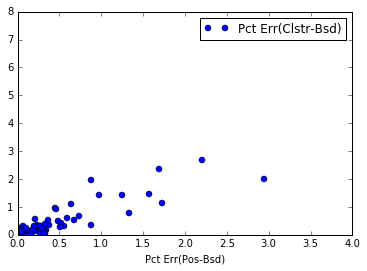

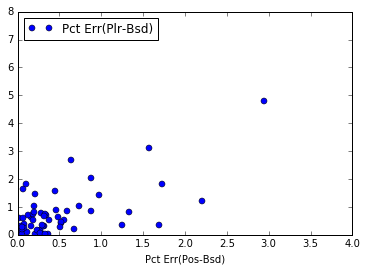

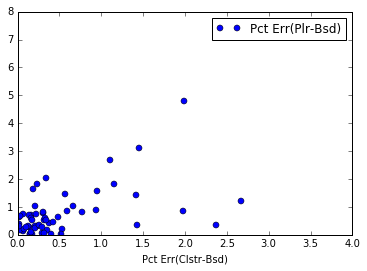

In [1551]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_df.plot(x='Pct Err(Pos-Bsd)', y='Pct Err(Clstr-Bsd)',style='o',ylim=[0,8],xlim=[0,4])
plot_df.plot(x='Pct Err(Pos-Bsd)', y='Pct Err(Plr-Bsd)',style='o',ylim=[0,8],xlim=[0,4])
plot_df.plot(x='Pct Err(Clstr-Bsd)', y='Pct Err(Plr-Bsd)',style='o',ylim=[0,8],xlim=[0,4])